<a href="https://colab.research.google.com/github/RalfH1388/genai-lecture/blob/main/california.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
import pandas as pd

dat = pd.read_excel('california.xlsx')

In [3]:
dat.head()
dat.shape
daten = dat.dropna()
daten.shape
daten = daten[['Längengrad', 'Breitengrad', 'Einkommen (Median)']]
daten.head()
daten.shape

,Längengrad,Breitengrad,Alter Bewohner (Median),Anzahl Zimmer,Anzahl Schlafzimmer,Anzahl Bewohner,Anzahl Haushalte,Einkommen (Median)
0,-120.54,38.41,21,1435,294.0,668,267,2.5667
1,-117.10,32.70,28,633,137.0,525,170,3.6042
2,-118.43,37.40,19,2460,405.0,1225,425,4.1576
3,-116.50,33.82,16,343,85.0,29,14,2.1042
4,-121.89,37.23,16,3574,466.0,1503,487,8.1988


(20640, 8)

(20433, 8)

,Längengrad,Breitengrad,Einkommen (Median)
0,-120.54,38.41,2.5667
1,-117.10,32.70,3.6042
2,-118.43,37.40,4.1576
3,-116.50,33.82,2.1042
4,-121.89,37.23,8.1988


(20433, 3)

In [4]:
from sklearn.cluster import KMeans

variabilitaet = []

K = range(1,10)

for k in K:
        kMeanModel = KMeans(n_clusters = k)
        kMeanModel.fit(daten)
        variabilitaet.append(kMeanModel.inertia_)

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

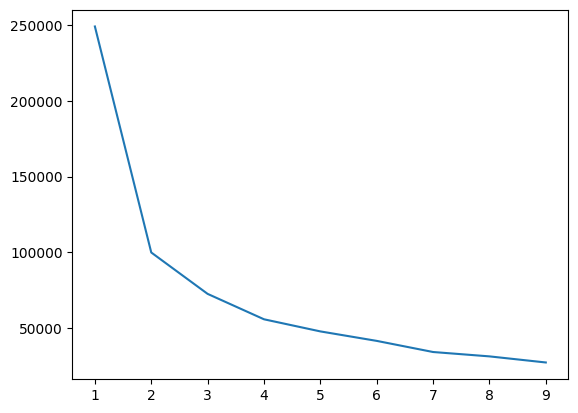

In [5]:
import matplotlib.pyplot as plt
plt.plot(K, variabilitaet)

In [7]:
kMeanModel = KMeans(n_clusters = 4)
kMeanModel.fit(daten)
kMeanModel.cluster_centers_
kMeanModel.n_iter_
kMeanModel.labels_[:50]

KMeans(n_clusters=4)

array([[-121.62154021,   38.07148346,    2.90007404],
       [-117.98971   ,   33.96723177,    3.04054647],
       [-118.05395213,   33.86109314,    6.40432481],
       [-121.95229481,   37.66438138,    6.0775372 ]])

20

array([0, 1, 0, 1, 3, 0, 1, 0, 2, 0, 0, 1, 0, 1, 1, 1, 1, 3, 0, 1, 0, 2,
       3, 0, 0, 0, 3, 2, 1, 3, 1, 2, 2, 0, 1, 1, 1, 2, 1, 0, 0, 0, 0, 3,
       0, 1, 0, 3, 0, 1], dtype=int32)

In [8]:
import numpy as np

daten[:4]
initiale_clusterzentren = daten[:4]
initiale_clusterzentren = np.array(initiale_clusterzentren)
initiale_clusterzentren

,Längengrad,Breitengrad,Einkommen (Median)
0,-120.54,38.41,2.5667
1,-117.10,32.70,3.6042
2,-118.43,37.40,4.1576
3,-116.50,33.82,2.1042


array([[-120.54  ,   38.41  ,    2.5667],
       [-117.1   ,   32.7   ,    3.6042],
       [-118.43  ,   37.4   ,    4.1576],
       [-116.5   ,   33.82  ,    2.1042]])

In [9]:
daten_array = np.array(daten)
daten_array[:4]

array([[-120.54  ,   38.41  ,    2.5667],
       [-117.1   ,   32.7   ,    3.6042],
       [-118.43  ,   37.4   ,    4.1576],
       [-116.5   ,   33.82  ,    2.1042]])

In [10]:
aktuelle_clusterzentren = initiale_clusterzentren

In [11]:
from numpy.linalg import norm

In [14]:
zugewiesene_clusterzentren = []
for i in daten_array:
    abstand = []
    for j in aktuelle_clusterzentren:
        abstand.append(norm(i-j))
    zugewiesene_clusterzentren.append(np.argmin(abstand))
daten_cluster = np.column_stack((daten_array, np.array(zugewiesene_clusterzentren)))
daten_cluster_0 = daten_cluster[daten_cluster[:, 3] == 0]
daten_cluster_1 = daten_cluster[daten_cluster[:, 3] == 1]
daten_cluster_2 = daten_cluster[daten_cluster[:, 3] == 2]
daten_cluster_3 = daten_cluster[daten_cluster[:, 3] == 3]
clusterzentrum_cluster_0 = np.mean(daten_cluster_0, axis = 0)
clusterzentrum_cluster_1 = np.mean(daten_cluster_1, axis = 0)
clusterzentrum_cluster_2 = np.mean(daten_cluster_2, axis = 0)
clusterzentrum_cluster_3 = np.mean(daten_cluster_3, axis = 0)
aktuelle_clusterzentren = np.array([clusterzentrum_cluster_0, clusterzentrum_cluster_1, clusterzentrum_cluster_2, clusterzentrum_cluster_3])
aktuelle_clusterzentren = np.delete(aktuelle_clusterzentren, 3, axis = 1)
aktuelle_clusterzentren
kMeanModel.cluster_centers_

array([[-121.7239759 ,   38.0647016 ,    3.21029681],
       [-117.96834412,   33.84494276,    4.92017584],
       [-121.11170522,   36.78912856,    7.20930995],
       [-117.98489   ,   34.01983916,    2.42712875]])

array([[-121.62154021,   38.07148346,    2.90007404],
       [-117.98971   ,   33.96723177,    3.04054647],
       [-118.05395213,   33.86109314,    6.40432481],
       [-121.95229481,   37.66438138,    6.0775372 ]])

In [ ]:
#import seaborn as sns

#sns.set_style('whitegrid')
#sns.relplot(x = daten_cluster[:, 0], y = daten_cluster[:, 1], hue = daten_cluster[:, 3], data=daten_cluster, palette = "pastel", kind='scatter');


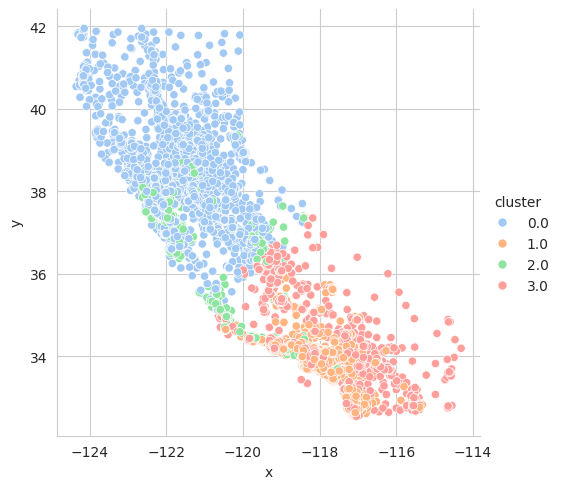

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Beispiel: Umwandlung von NumPy-Array in DataFrame
df = pd.DataFrame(daten_cluster, columns=["x", "y", "z", "cluster"])

# Optional: sicherstellen, dass 'cluster' als Kategorie interpretiert wird
df["cluster"] = df["cluster"].astype(str)

# Plot
sns.set_style('whitegrid')
sns.relplot(x="x", y="y", hue="cluster", data=df, palette="pastel", kind='scatter')
plt.show()